In [1]:
pip install numpy

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


In [3]:
import numpy as np
import matplotlib.pyplot as plt

### 1. Гистограмма случайных данных

####  Параметры нормального распределения

In [4]:
mean = 0  # Среднее значение
std_dev = 1  # Стандартное отклонение
num_samples = 1000  # Количество образцов

#### Генерация случайных чисел

In [5]:
data = np.random.normal(mean, std_dev, num_samples)

#### Построение гистограммы

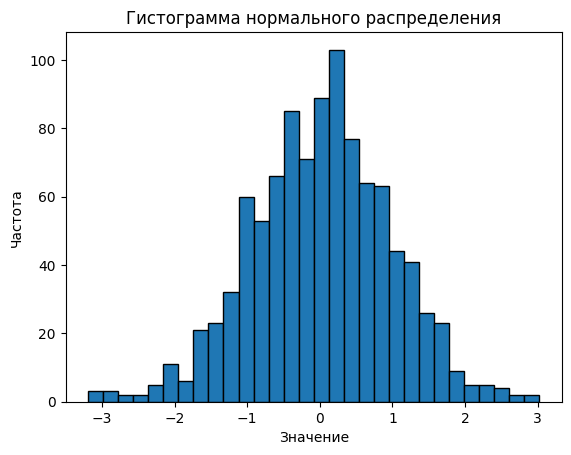

In [6]:
plt.hist(data, bins=30, edgecolor='black')
plt.title("Гистограмма нормального распределения")
plt.xlabel("Значение")
plt.ylabel("Частота")
plt.show()

###  2. Диаграмма рассеяния двух случайных массивов

#### генерация двух массивов случайных чисел (размером 100)

In [7]:
x = np.random.rand(100)
y = np.random.rand(100)

#### Диаграмма рассеяния

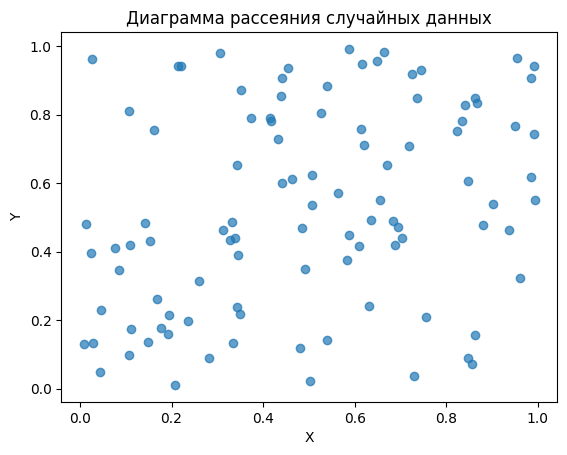

In [8]:
plt.scatter(x, y, alpha=0.7)
plt.title("Диаграмма рассеяния случайных данных")
plt.xlabel("X")
plt.ylabel("Y")
plt.show()

### 3. Парсинг цен на диваны с divan.ru, анализ и визуализация

In [9]:
pip install requests beautifulsoup4 pandas

Note: you may need to restart the kernel to use updated packages.


In [10]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

#### Заголовки для имитации браузера

In [32]:
headers = {
    "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36"
}


#### URL первой страницы каталога диванов

In [33]:
url = "https://www.divan.ru/rostov-na-donu/category/divany-i-kresla?sort=0"

In [34]:
response = requests.get(url, headers=headers)
soup = BeautifulSoup(response.text, 'html.parser')

#### Проверяем, как устроены карточки

На конец 2025 года часто встречается такой класс (проверить через f12)

In [35]:
cards = soup.find_all('div', {'data-testid': 'product-card'})
print(f"Найдено карточек: {len(cards)}")

Найдено карточек: 53


#### Парсим названия и цены (структуру сайта проверьте; далее примерная структура)

In [36]:
names = []
prices = []

for card in cards:
    # Название товара - ищем в ссылке с классом ProductName
    name_tag = card.find('a', class_='ProductName')
    if name_tag:
        # Получаем текст из span внутри ссылки
        span_tag = name_tag.find('span')
        name = span_tag.text.strip() if span_tag else name_tag.text.strip()
    else:
        name = 'NO_NAME'
    
    # Цена товара - ищем span с data-testid="price"
    price_tags = card.find_all('span', {'data-testid': 'price'})
    price = None
    
    for price_tag in price_tags:
        price_text = price_tag.text.strip()
        # Извлекаем только цифры из текста цены
        price_digits = ''.join(filter(str.isdigit, price_text))
        if price_digits:
            try:
                price = int(price_digits)
                break  # Берём первую найденную цену
            except ValueError:
                continue
    
    # Добавляем в список только если нашли и название, и цену
    if name != 'NO_NAME' and price:
        names.append(name)
        prices.append(price)
        print(f"Найден товар: {name} - {price} руб.")

Найден товар: Диван прямой Филс-Мини 120 Velvet Terra - 5315 руб.
Найден товар: Кресло Кастел Velvet Olive - 2932 руб.
Найден товар: Кресло Орхет Velvet Marsala - 3299 руб.
Найден товар: Пуф Дзен Лес - 1465 руб.
Найден товар: Диван прямой Массе-М Мини Velvet Navy Blue - 9165 руб.
Найден товар: Диван прямой Спейс Velvet Olive - 18698 руб.
Найден товар: Кресло Нелви Cozy Terra - 4949 руб.
Найден товар: Диван прямой Мелоу Velvet Beige - 10082 руб.
Найден товар: Пуф Кропс Bucle Lilac - 1832 руб.
Найден товар: Диван прямой Клаймар Velvet Terra - 11549 руб.
Найден товар: Кресло Тут Рядом Мечта Сине-бежевое - 3665 руб.
Найден товар: Диван прямой Аронт Мини Velvet Pink - 10632 руб.
Найден товар: Диван прямой Лонди Cozy Ecru - 10082 руб.
Найден товар: Пуф Дзен-1 Диалог - 2015 руб.
Найден товар: Диван угловой Нордика мини Velvet Olive - 10999 руб.
Найден товар: Кресло Пайл Textile Ginger - 5132 руб.
Найден товар: Диван прямой Льери Мини Velvet Yellow - 17873 руб.
Найден товар: Кресло Кенсол Velv

#### Создание DataFrame и экспорт в CSV


Всего товаров: 48
Средняя цена на диваны: 11367.19 руб.


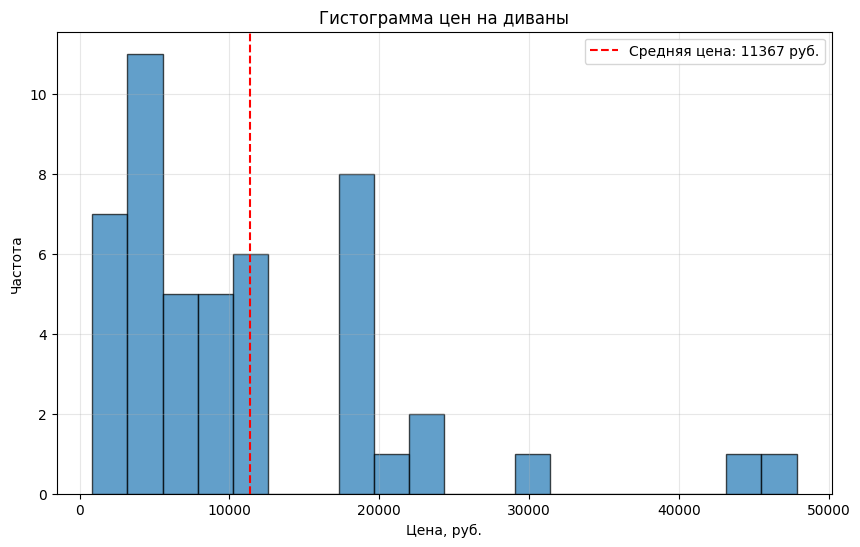


Примеры товаров:
                                     Название  Цена
0     Диван прямой Филс-Мини 120 Velvet Terra  5315
1                  Кресло Кастел Velvet Olive  2932
2                 Кресло Орхет Velvet Marsala  3299
3                                Пуф Дзен Лес  1465
4  Диван прямой Массе-М Мини Velvet Navy Blue  9165


In [37]:
if names and prices:
    df = pd.DataFrame({'Название': names, 'Цена': prices})
    df.to_csv('divan_prices.csv', index=False, encoding='utf-8')
    
    print(f"\nВсего товаров: {len(df)}")
    print(f"Средняя цена на диваны: {df['Цена'].mean():.2f} руб.")
    
    # Построение гистограммы цен
    plt.figure(figsize=(10, 6))
    plt.hist(df['Цена'], bins=20, edgecolor='black', alpha=0.7)
    plt.title("Гистограмма цен на диваны")
    plt.xlabel("Цена, руб.")
    plt.ylabel("Частота")
    plt.grid(True, alpha=0.3)
    
    # Добавляем статистики на график
    plt.axvline(df['Цена'].mean(), color='red', linestyle='--', 
                label=f'Средняя цена: {df["Цена"].mean():.0f} руб.')
    plt.legend()
    plt.show()
    
    # Показываем несколько примеров
    print("\nПримеры товаров:")
    print(df.head())
    
else:
    print("Товары не найдены. Проверьте селекторы.")